80


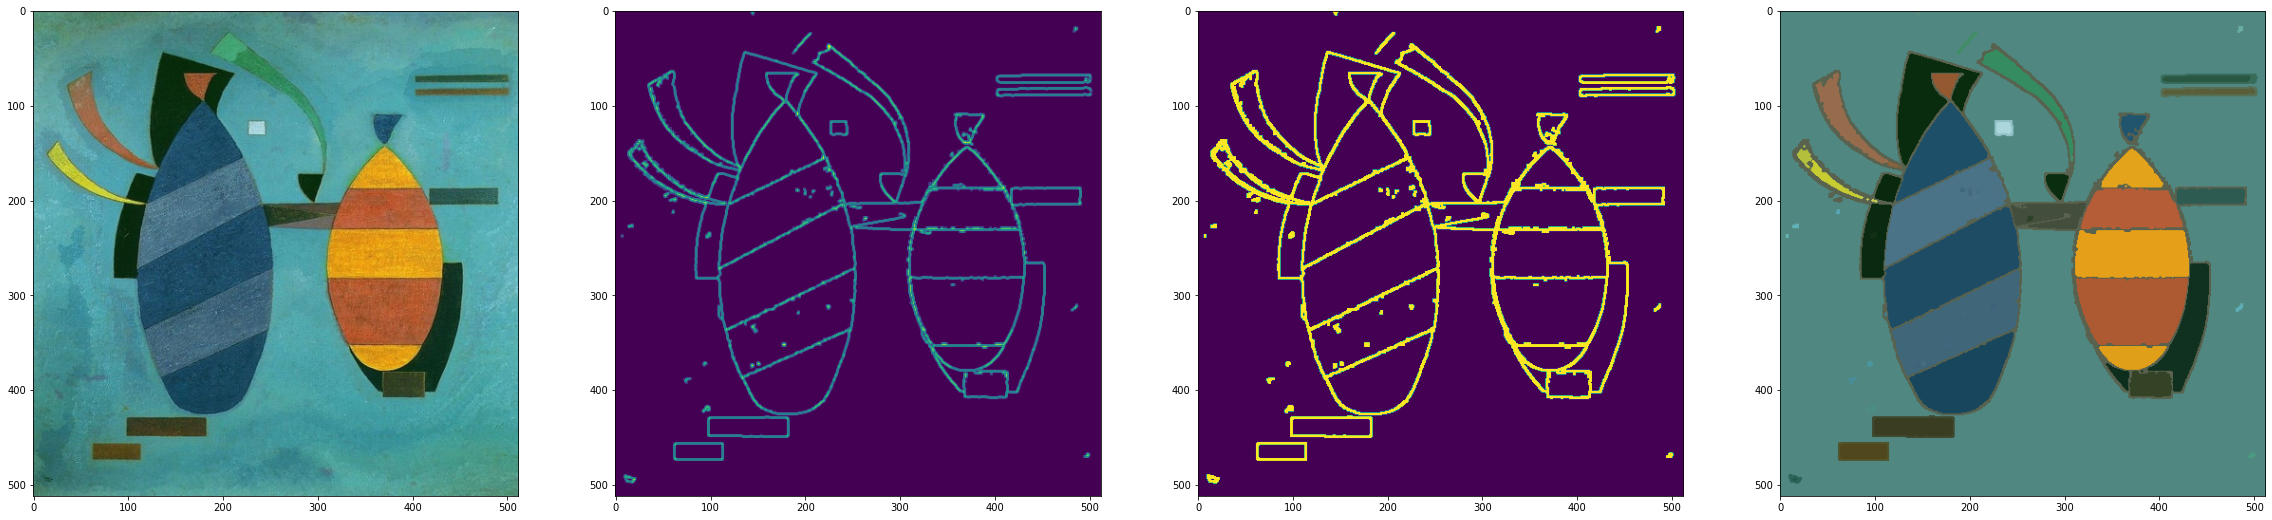

In [11]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import os

# Importamos la imagen y la volvemos gris
img = cv2.resize(cv2.cvtColor(cv2.imread('./k/459.jpeg'), cv2.COLOR_BGR2RGB),(512,512),interpolation = cv2.INTER_AREA)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sacamos las edges
edges = cv2.Canny(img,100,200)
edges = cv2.GaussianBlur(edges,(3,3),cv2.BORDER_DEFAULT)

# Sacamos los contornos
promedio = cv2.mean(imgray)[0]
ret, thresh = cv2.threshold(edges, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key = lambda x: cv2.contourArea(x),reverse=True)

#Dibujamos los contornos

final = np.zeros(img.shape,np.uint8)
final[:]=(cv2.mean(img)[0],cv2.mean(img)[1],cv2.mean(img)[2])
mask = np.zeros(imgray.shape,np.uint8)

for i in range(0,min(len(contours),100)):
    mask[...]=0
    cv2.drawContours(mask,contours,i,255,-1)
    cv2.drawContours(final,contours,i,cv2.mean(img,mask),-1)

print(len(contours))
fig = plt.figure(figsize=(40,80))
fig.add_subplot(1,4,1)
plt.imshow(img)
fig.add_subplot(1,4,2)
plt.imshow(edges)
fig.add_subplot(1,4,3)
plt.imshow(thresh)
fig.add_subplot(1,4,4)
plt.imshow(final)


In [184]:
i=0
for cuadro in os.listdir("./k"):
    if cuadro != ".DS_Store":
        #img = cv2.cvtColor(cv.imread(os.path.join(path,cuadro)), cv2.COLOR_BGR2RGB)
        img = cv2.imread(os.path.join("./k",cuadro))
        img = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)
        cv2.imwrite("{}.jpg".format(i),img)
        i += 1

        img = cv2.rotate(img, cv2.ROTATE_180)
        cv2.imwrite("{}.jpg".format(i),img)
        i += 1

In [185]:
def llaveSort(cuadro):
    if cuadro != ".DS_Store":
        return int(cuadro.replace(".jpg",""))
    else:
        return -1

i=0
directorio = os.listdir("./k_resize")
directorio.sort(key=llaveSort)

for cuadro in directorio:
    if cuadro != ".DS_Store":
        # Importamos la imagen y la volvemos gris
        img = cv2.imread(os.path.join("./k_resize",cuadro))
        imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Sacamos las edges
        edges = cv2.Canny(img,100,200)
        edges = cv2.GaussianBlur(edges,(3,3),cv2.BORDER_DEFAULT)

        # Sacamos los contornos
        ret, thresh = cv2.threshold(edges, 10, 255, cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        contours = sorted(contours, key = lambda x: cv2.contourArea(x),reverse=True)

        #Dibujamos los contornos
        final = np.zeros(img.shape,np.uint8)
        final[:]=(cv2.mean(img)[0],cv2.mean(img)[1],cv2.mean(img)[2])
        mask = np.zeros(imgray.shape,np.uint8)

        for j in range(0,min(len(contours),100)):
            mask[...]=0
            cv2.drawContours(mask,contours,j,255,-1)
            cv2.drawContours(final,contours,j,cv2.mean(img,mask),-1)


        cv2.imwrite("{}.jpg".format(i),final)
        i += 1